In [3]:
import pickle
import time
import random
import numpy as np

from collections import Counter
from annoy import AnnoyIndex
from tqdm.notebook import tqdm
from scipy.spatial.distance import euclidean, pdist, squareform
import scipy
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
from matplotlib import pyplot as plt
from typing import *

In [4]:
def read_glove_file(size=None) -> Dict[str, List[float]]:
    glove_file = '/mnt/Spookley/datasets/glove/glove.6B.50d.txt'
    w_vecs = {}
    with tqdm(total=400000) as pbar:
        with open(glove_file) as fh:
            for line in fh.readlines():
                
                pbar.update(1)
                toks = line.strip().split()
                word = toks[0]
                # non-words like punctuation marks have entries, but we don't want those
                if not word.isalnum():  
                    continue
                # Some bigrams and trigrams are in the dataset. Skip those.
                try:
                    float(toks[1])
                except ValueError:
                    continue
                # No errors, parse the line.
                vec = [float(s) for s in toks[1:]]
                w_vecs[word] = vec
                if size is not None and len(w_vecs) == size:
                    break
    return w_vecs

In [5]:
def build_index(w_vecs: Dict[str, List[float]]) -> Tuple[Dict[int, str], AnnoyIndex]:
    GLOVE_VEC_SIZE = 50
    idx_to_word = {}
    ann_index = AnnoyIndex(GLOVE_VEC_SIZE, 'euclidean')
    with tqdm(total=len(w_vecs)) as pbar:
        for i, w in enumerate(w_vecs.keys()):
            pbar.update(1)
            ann_index.add_item(i, w_vecs[w])
            idx_to_word[i] = w
    ann_index.build(20) # n trees
    return idx_to_word, ann_index

In [6]:
w_vecs = read_glove_file(size=20000)
mat = np.array([w_vecs[w] for w in w_vecs])

  0%|          | 0/400000 [00:00<?, ?it/s]

In [10]:
pca = PCA(n_components=20)
mat_small = pca.fit_transform(mat)

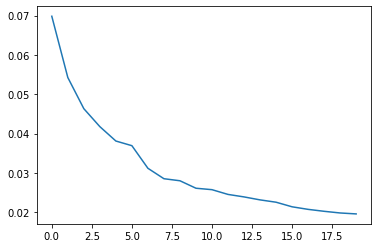

In [13]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
# so yeah, 10 components wouldn't be a disaster, 5's probably too few.